## Correlations between Attributes

To get an overview of how the attributes in the dataset are correlated, a correlation heatmap might be of great help.

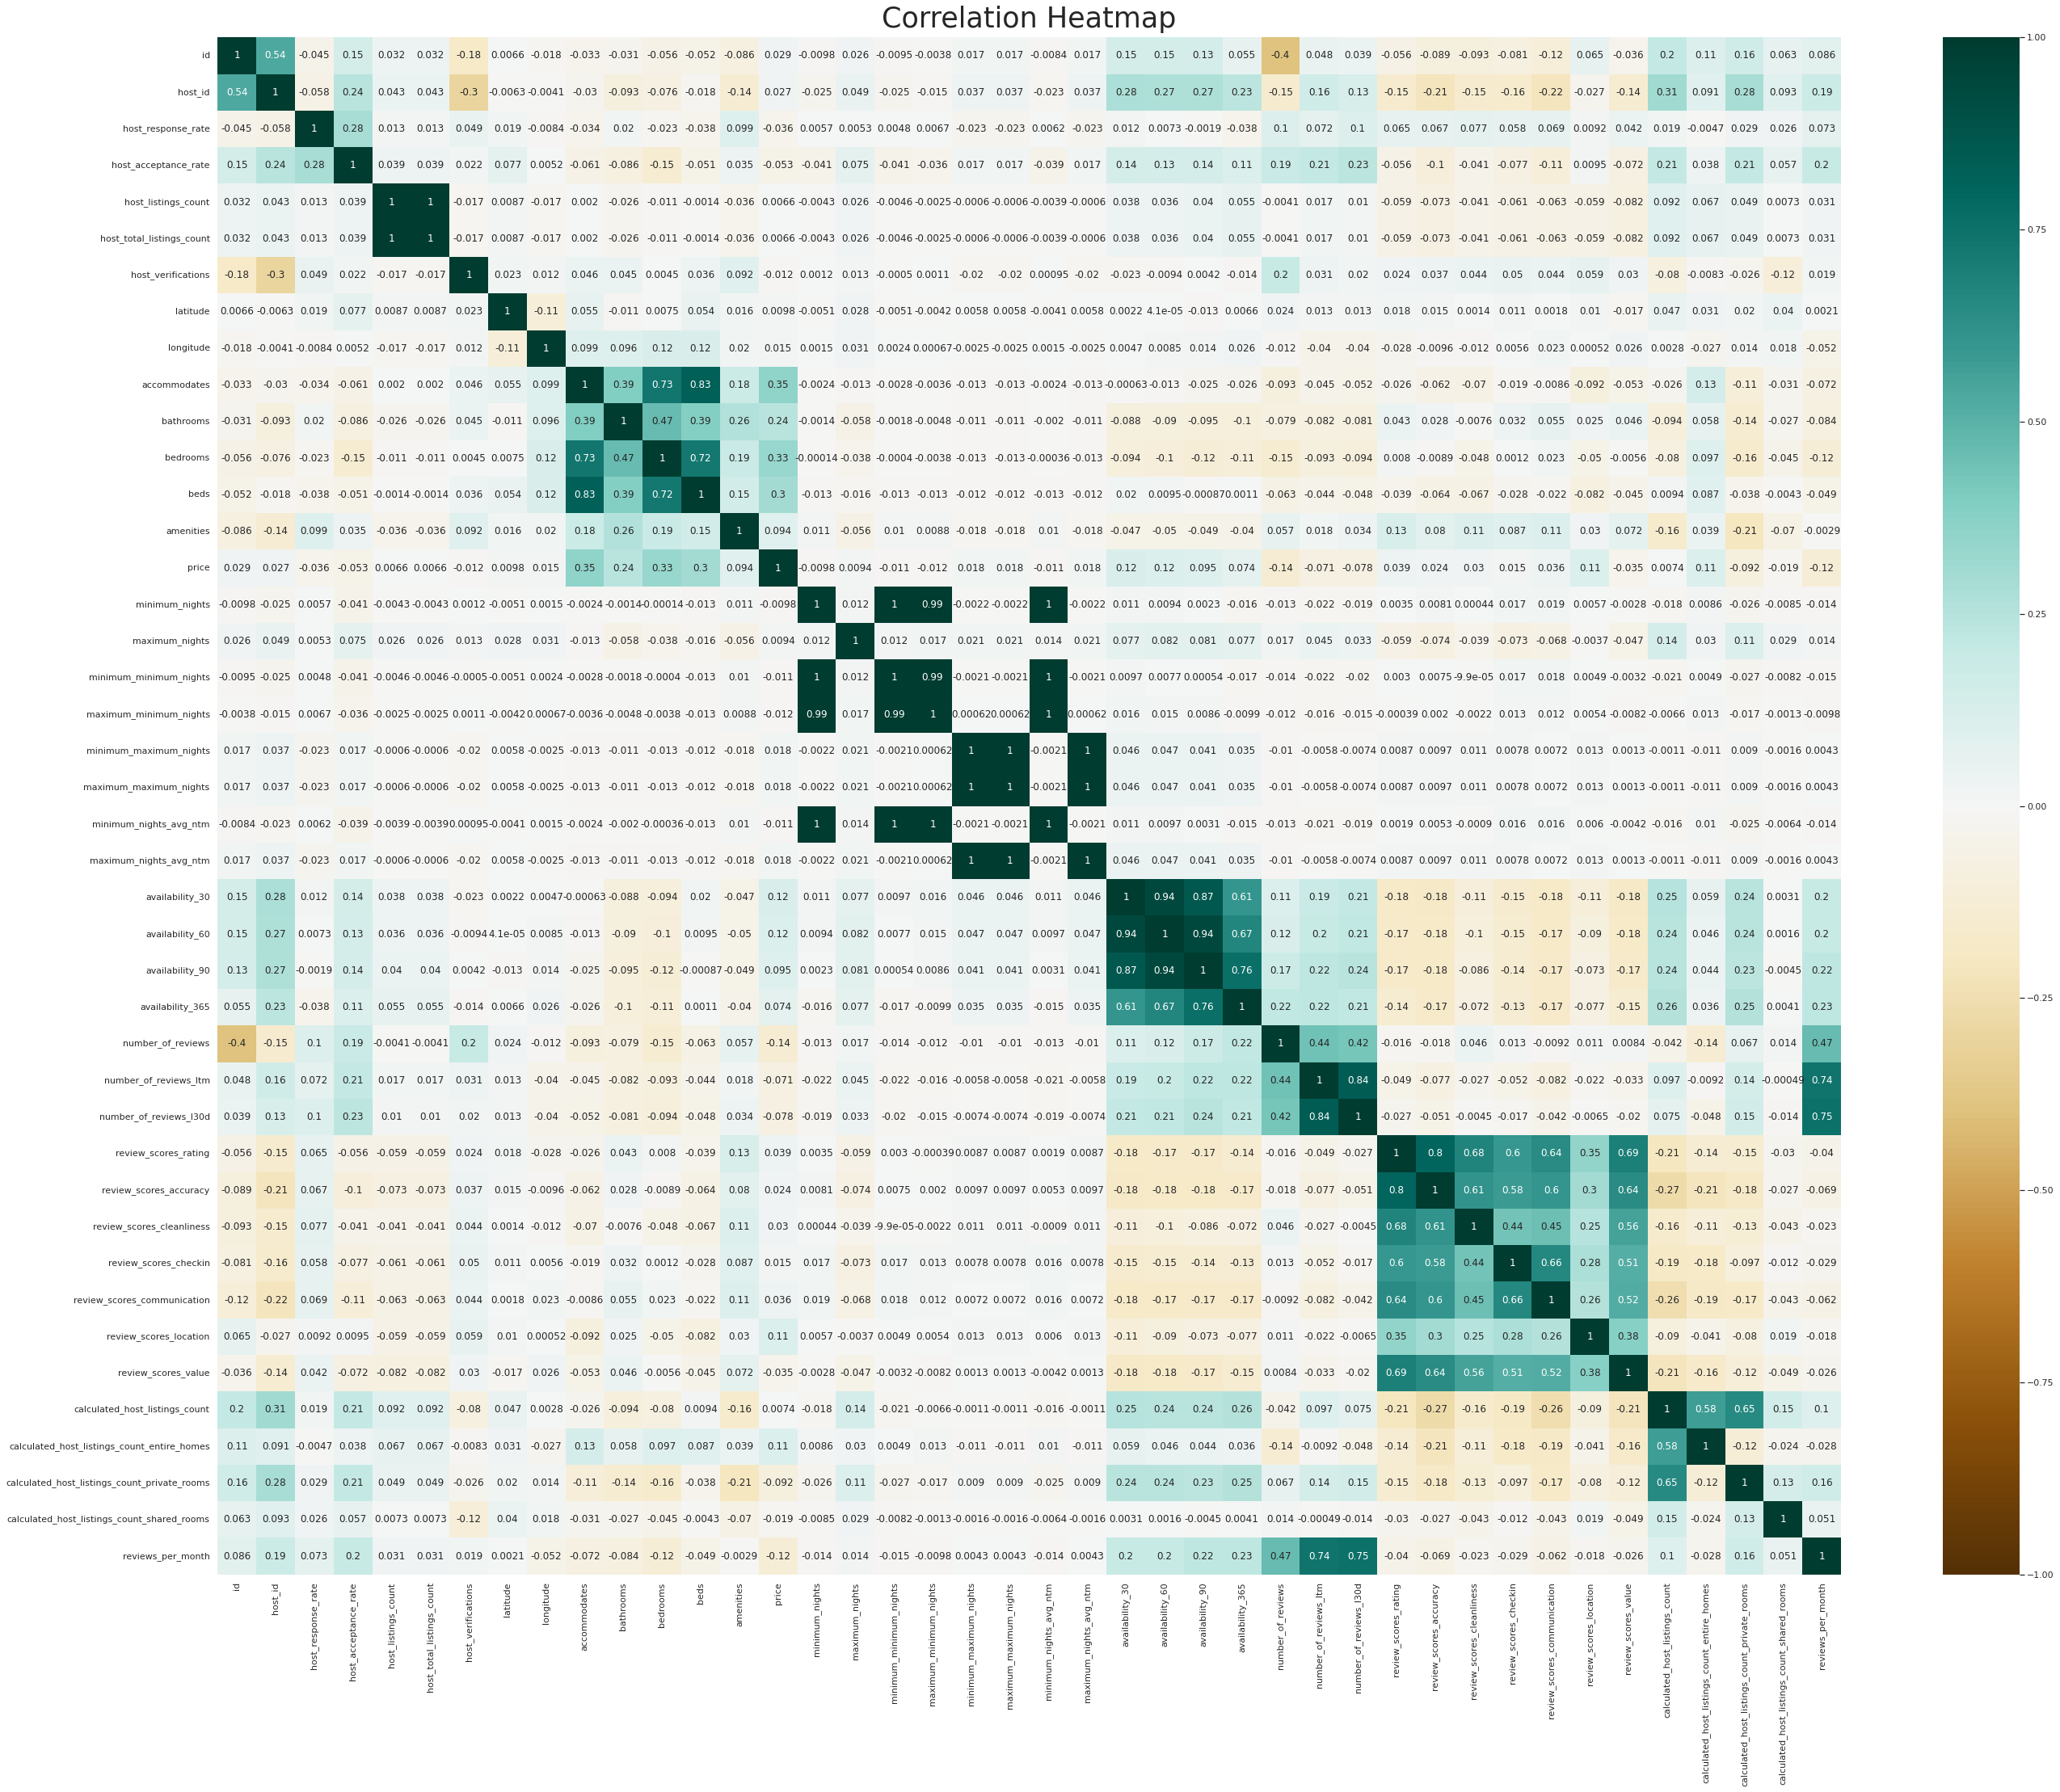

In [46]:
# set figure size
plt.figure(figsize=(45, 35))
# define plot with appropriate colormap
heatmap = sns.heatmap(listings.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# set title of heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':35}, pad=12);

Obvious relationships can already be seen for the different types of reviews, furnishing and listing counts (greenish blocks).
Correlations with higher positive and negative values seem to be appropriate to focus on (excluding values close to _-1_ or _1_ as they are mostly obvious).

The density plot already highlights 4 different neighbourhoods which have the majority of their _ratings_ mostly centered around 5. A further boxplot will let one compare the different areas much easier.

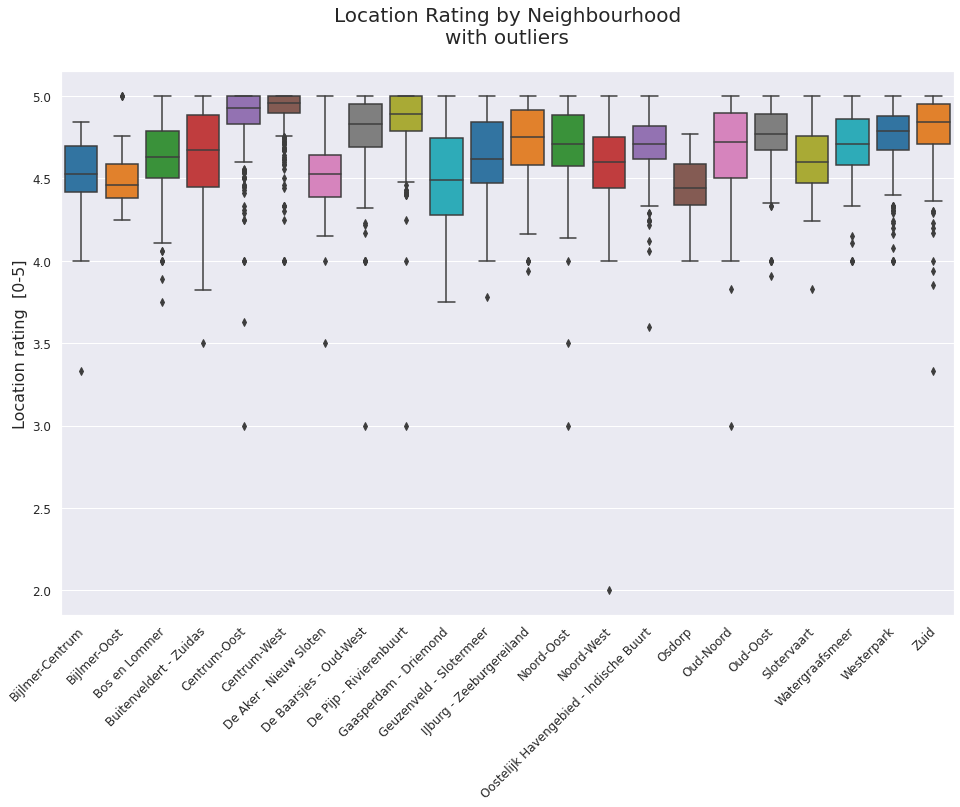

In [53]:
def plot6(outliers = False):
    # Plotting
    plt.rcParams["figure.figsize"] = (16,10)

    graph = sns.boxplot(
        showfliers=outliers,
        data=neighbourhood_ratings_df,
        palette=color)
    
    if outliers:
        graph.axes.set_title("Location Rating by Neighbourhood\nwith outliers\n",fontsize=20)
    else:
        graph.axes.set_title("Location Rating by Neighbourhood\n",fontsize=20)
    graph.set_ylabel("Location rating  [0-5]",fontsize=16)
    graph.tick_params(labelsize=12)

    # Rotate labels to be readable
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in neighbourhood_distribution]
    _ = plt.xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45)

    _ = plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plot6(True)

Clearly, **Centrum-Oost** and **Centrum-West** are the highest rated locations. This also makes sense when looking at the amount of listings in the corresponding areas. Especially the latter, **Centrum-West**, seems to be the highest rating neighbourhood. **De Pijp - Rivierenbuurt** is worth mentioning as well.

Furthermore, the ratings for **Gaasperdam-Driemond** vary the most - it has the lowest boxplot-minimum while also having its maximum at 5. Remarkably, the lowest median values are found in **Bijlmer-Oost** and **Osdorp**. It may be noted that these three neighbourhoods only have a small amount of listings available, which certainly could be the reason for their extraordinary numbers.

#### Neighbourhood / Price
The focus now switches to the relationship between the neighbourhoods and their respective price distributions. The approach stays the same.

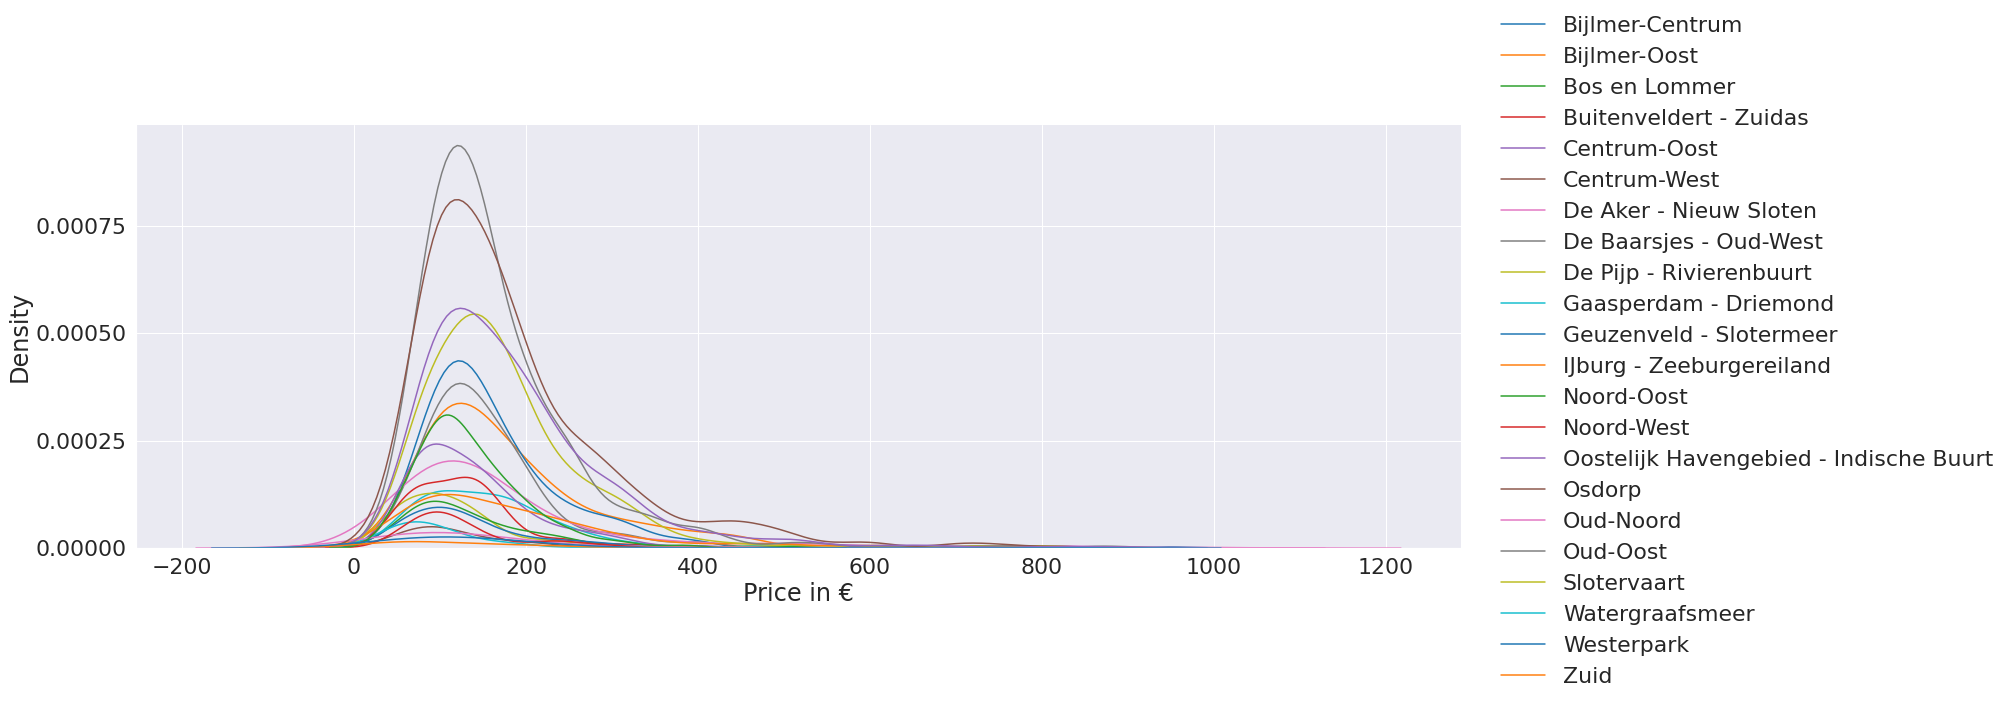

In [55]:
plot = sns.displot(
    data=neighbourhood_prices_df,
    kind='kde',
    height=7,
    aspect=3,
    palette=color
)
sns.set(font_scale = 4)
_ = plot.set(xlabel='Price in €')

The density plot already indicates, that most locations have similar prices on the lower end. A few neighbourhoods have remarkably larger price ranges than the remaining locations.

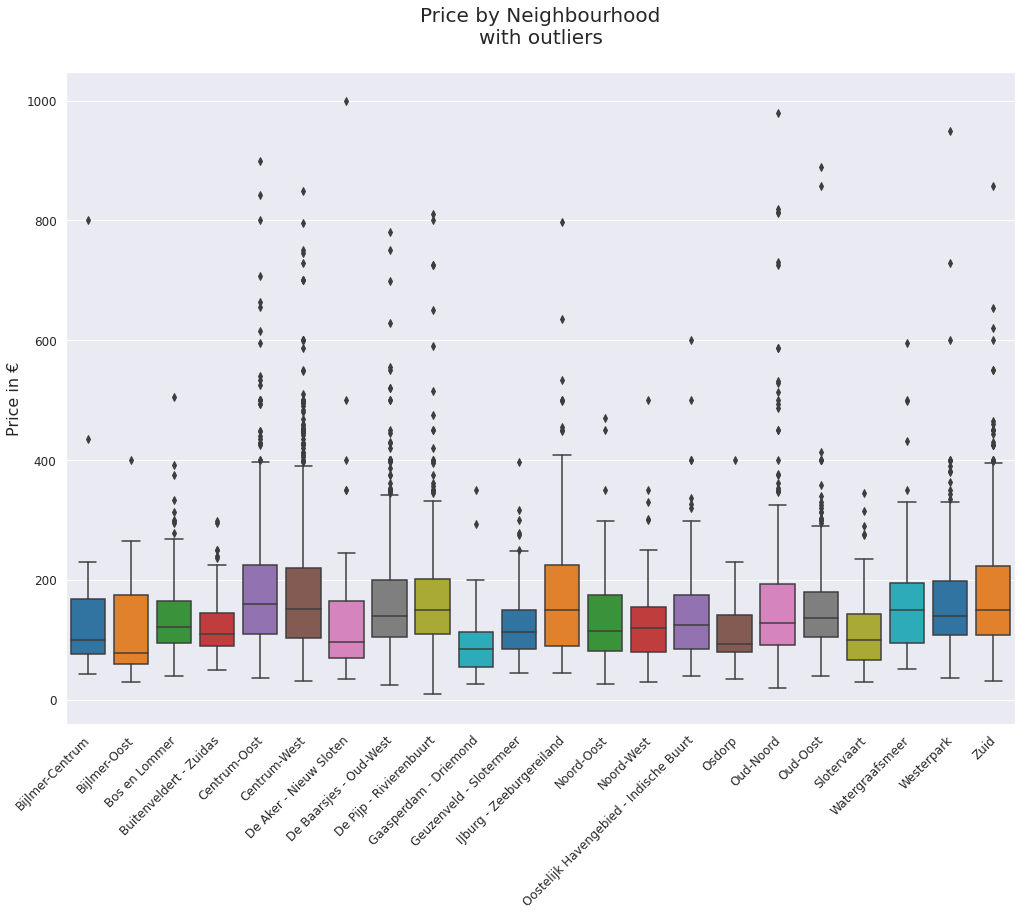

In [56]:
def plot7(outliers = False):
    # Plotting
    plt.rcParams["figure.figsize"] = (17,12)
    graph = sns.boxplot(
        showfliers=outliers,
        data=neighbourhood_prices_df,
        palette=color)
    
    if outliers:
        graph.axes.set_title("Price by Neighbourhood\nwith outliers\n",fontsize=20)
    else:
        graph.axes.set_title("Price by Neighbourhood\n",fontsize=20)
        
    graph.set_ylabel("Price in €",fontsize=16)
    graph.tick_params(labelsize=12)

    # Rotate labels to be readable
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in neighbourhood_distribution]
    _ = plt.xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45)
    _ = plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plot7(True)

For the price-distribution, it seems obvious that there are many outliers present. Focusing on the plot with hidden outliers should give a good enough picture about the different distributions. The **minimum-prices** of the neighbourhoods **vary between 10-50€**. The **maximum-prices** of the neighbourhoods vary between **200-420€**

**Gaasperdam - Driemond** has the lowest and also smallest price range, even though its neighbourhood has the highest variation in its location ratings. Again, it may be noted that only 0.8% of listings are located there.

**Ijburg - Zeeburgereiland** reaches the highest maximum at about **420€** with a large price range, while having an average number of listings available. Its rating is situated rather average.
**Centrum--Oost** and **Centrum-West** are very similar, but with much more listings and higher ratings.

### Conclusion / Correlations
To see if there is any relationship between the _location-rating_ and _price_ for each neighbourhood, plotting it as histogramms collectively might already highlight any correlation. The _ratings_ and _prices_ will be averaged for each neighbourhood.

The average _rating_ values vary between 4 and 5, whereas the average _prices_ vary between approx. 100 and 180. When plotting on the same graph, one needs to "norm" respective y-axes. 

Furthermore, to highlight neighbourhoods with good _ratings_ and low _prices_, a stronger color opacity will indicate respective areas.

In [58]:
# Get individual neighbourhood-data

prices = []
ratings = []


for i in listings_neighbourhood.index:
    listings_current_neighbourhood = listings[listings["neighbourhood_cleansed"] == i]
    
    prices.append(listings_current_neighbourhood["price"])
    # drop entries where price == 0 or > 500
    prices[-1] = prices[-1][prices[-1]!=0]
    prices[-1] = prices[-1][prices[-1]<500]
    
    prices[-1] = prices[-1].mean()
    
    ratings.append(listings_current_neighbourhood["review_scores_location"])
    ratings[-1] = ratings[-1].mean()
    
    
      
labels = listings_neighbourhood.index

### calculations to center the mean values
min_price = min(prices)
max_price = max(prices)

min_rating = min(ratings)
max_rating = max(ratings)

avg_price = sum(prices)/len(prices)
avg_rating = sum(ratings)/len(ratings)

In [59]:
# plot1
def plot1(figsize = (15,10)):
    # Figsize
    _ = plt.figure(figsize=figsize)

    # Get colormap
    cmap = plt.get_cmap("Blues")
    color = cmap(0.5)
    
    ## Plotting
    neighbourhood_distribution = plt.bar(labels, prices, color=color, width=0.35)

    ## Title and Labels
    _ = plt.ylabel("Average Price in €", fontsize=16)
    _ = plt.title(f'Average Price by Neighbourhood\n', fontsize=20)
    _ = plt.yticks(fontsize=14)
    
    # Set background and grid color
    ax.set_facecolor('0.9')
    ax.grid(color='0.85', linewidth=0.7)

    # Rotate labels to be readable
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in neighbourhood_distribution]
    _ = plt.xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45, fontsize=12)

In [60]:
# plot2
def plot2(figsize = (15,10)):
    # Figsize
    _ = plt.figure(figsize=figsize)

    # Get colormap
    cmap = plt.get_cmap("Greens")
    color = cmap(0.5)
    
    ## Plotting
    neighbourhood_distribution = plt.bar(labels, ratings, color=color, width=0.35)

    ## Title and Labels
    _ = plt.ylabel("Average Location Rating [0-5]", fontsize=16)
    _ = plt.title(f'Average Rating by Neighbourhood\n', fontsize=20)
    _ = plt.yticks(fontsize=14)
    
    # Set background and grid color
    ax.set_facecolor('0.9')
    ax.grid(color='0.85', linewidth=0.7)

    # Rotate labels to be readable
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in neighbourhood_distribution]
    _ = plt.xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45, fontsize=12)

In [61]:
# plot3
def plot3(figsize = (15,10)):
    
    ### Bar plot
    # figsize
    plt.rcParams["figure.figsize"] = figsize

    # the label locations
    x = np.arange(len(labels))
    # the width of the bars
    width = 0.275

    # 2 different subplots for Price and Rating
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    # Colors
    # We want to distinguish low prices with high ratings

    # get individual colormaps
    cmap_price = mtl.cm.get_cmap('Blues')
    cmap_rating = mtl.cm.get_cmap('Greens')

    # get individual color-values as list of colors
    colors_price = cmap_price(0.5)
    colors_rating = cmap_rating(0.5)

    rects1 = ax.bar(x - width/2, prices, width, color=colors_price)
    rects2 = ax2.bar(x + width/2, ratings, width, color=colors_rating)

    ax.set_ylim(bottom=0, top=max_price + 0.1*avg_price)
    ax2.set_ylim(bottom=0, top=max_rating + 0.1*avg_rating)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    legend = plt.legend([rects1, rects2],["Price", "Rating"], loc="upper left", prop={'size': 15})

    ax.set_title(f'Average Price/Rating by Neighbourhood\n', fontsize=20)
    price_label = ax.set_ylabel("Average Price in €", fontsize=16)
    price_label.set_color(cmap_price(0.6))
    rating_label = ax2.set_ylabel("Average Location Rating [0-5]", fontsize=16)
    rating_label.set_color(cmap_rating(0.6))

    # Rotate labels to be readable
    xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in neighbourhood_distribution]
    _ = ax.set_xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45, fontsize=12)
    _ = ax2.set_xticks(xticks_pos, listings_neighbourhood.index,  ha='right', rotation=45, fontsize=12)
    
    _ = plt.yticks(fontsize=14)

    # Set background and grid color
    ax.set_facecolor('0.95')
    ax2.set_facecolor('0.95')
    ax.grid(color='0.85', linewidth=0.7)
    ax2.grid(color='0.85', linewidth=0.7)
    
    ax.yaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)

    # Set layout
    _ = fig.tight_layout()

    plt.show()

    # reset figsize for further plots 
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

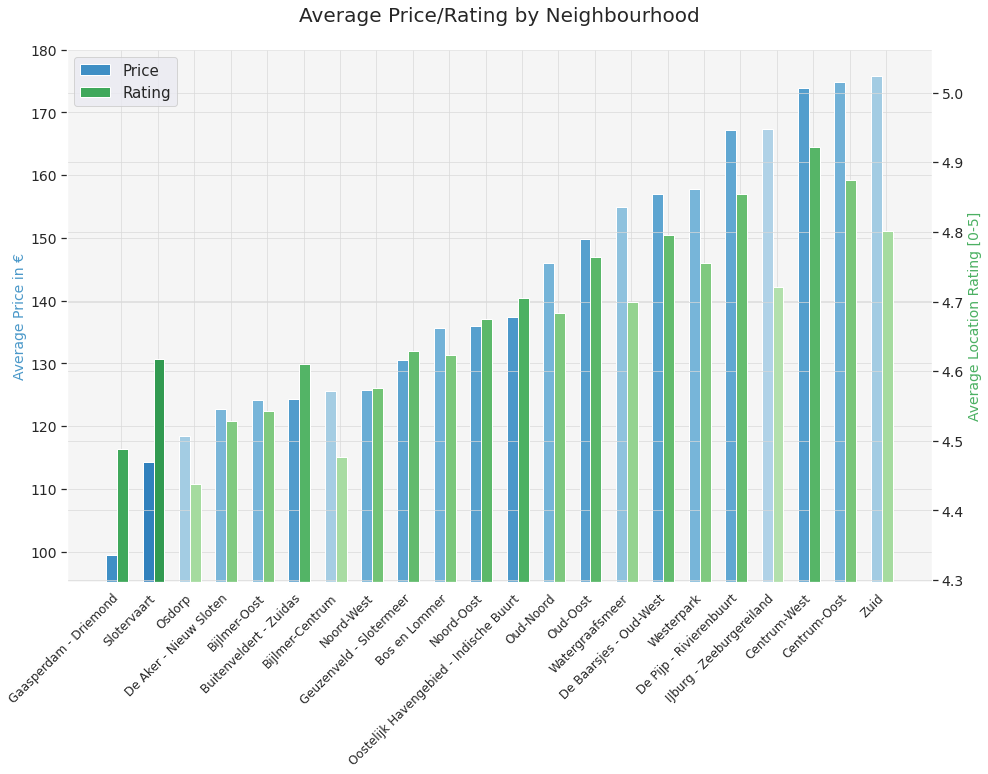

In [64]:
# Get individual neighbourhood-data ORDERED

_prices = []
ratings = []


for i in listings_neighbourhood.index:
    listings_current_neighbourhood = listings[listings["neighbourhood_cleansed"] == i]
    
    _prices.append(listings_current_neighbourhood["price"])
    # drop entries where price == 0 or > 500
    _prices[-1] = _prices[-1][_prices[-1]!=0]
    _prices[-1] = _prices[-1][_prices[-1]<500]
    
    _prices[-1] = _prices[-1].mean()
    
    ratings.append(listings_current_neighbourhood["review_scores_location"])
    ratings[-1] = ratings[-1].mean()
    
labels = list(listings_neighbourhood.index)
    
prices, ratings = (list(t) for t in zip(*sorted(zip(_prices, ratings))))

idx = np.argsort(_prices)

_, labels = (list(t) for t in zip(*sorted(zip(_prices, labels))))

### calculations to center the mean values
min_price = min(prices)
max_price = max(prices)

min_rating = min(ratings)
max_rating = max(ratings)

avg_price = sum(prices)/len(prices)
avg_rating = sum(ratings)/len(ratings)

plot4(figsize2)

Interestingly, the best _price/rating_ scores can be found for the cheapest neighbourhoods. Centered neighbourhoods maintain an average _price/rating_, whereas the worst scoring neighbourhoods are on the more expensive(right hand) side.

One can clearly see its correlation, as there are genereally higher ratings on the right hand side.

**Note**: The best _price/rating_ score is reached, when a neighbourhood has the highest (relative) _rating_ and the lowest (relative) _price_.

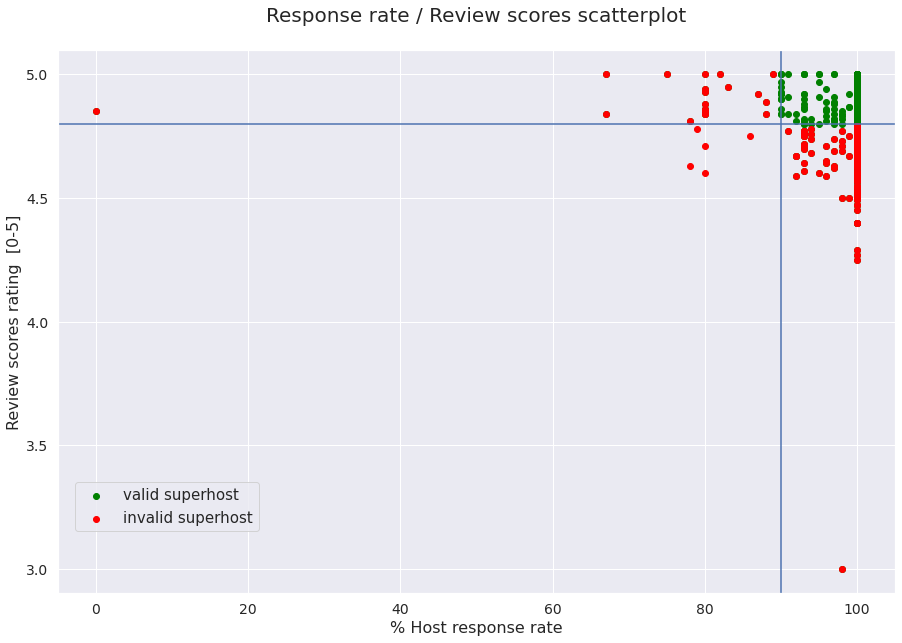

In [68]:
# splitting into seperate datasets
invalid_sh = listings_sh[(listings_sh["review_scores_rating"] < 4.8) | (listings_sh["host_response_rate"] < 90)]
valid_sh = listings_sh[(listings_sh["review_scores_rating"] >= 4.8) | (listings_sh["host_response_rate"] >= 90)]

# Plotting
_ = plt.rcParams["figure.figsize"] = (15,10)
_ = plt.ylabel("Review scores rating  [0-5]", fontsize=16)
_ = plt.xlabel("% Host response rate", fontsize=16)
_ = plt.title(f'Response rate / Review scores scatterplot\n', fontsize=20)

plot = plt.scatter('host_response_rate', 'review_scores_rating', c = ["green"], data=valid_sh)
plot = plt.scatter('host_response_rate', 'review_scores_rating', c = ["red"], data=invalid_sh)
# Legend
lgnd = plt.legend(['valid superhost', 'invalid superhost'], loc='lower center', bbox_to_anchor=(-0.12, 0.1, 0.5, 0.5), prop={'size': 15})
colors=['green', 'red']
for i, j in enumerate(lgnd.legendHandles):
    j.set_color(colors[i])
    j.set_alpha(1)

# horizontal and vertical lines
ynew = 4.8
xnew = 90
plt.axhline(ynew, color='b')
plt.axvline(xnew, color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Reset figsize for further plots
_ = plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Notably, the number of listings with a _response-rate_ of 0% and 50% shrunk immensely. Still, one listing remained with a _response-rate_ of 0%.

Even though a slight correlation is recognizable, having more than 2 verifications seems to be enough for hosts to get the most bookings. In contrast, a high _number-of-verifications_ yields more _reviews_. Considering the small sample sizes on both ends (0, 1, 9, 10 host verifications bins), the plots of those bins might not be that accurate.

It might have something to do with special types of verifications that yield the most bookings.